In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import boxcox
import scipy.stats as stats


# Cargar el archivo Excel proporcionado
file_path = 'C:/Users/User/Desktop/Promedios_fenoles_polisacaridos.xlsx'
data_1 = pd.read_excel(file_path)

# Mostrar las primeras filas para verificar los datos
data_1.head()

,Temp_C,Tiempo_h,Solv_rel,Fenoles,Polisacaridos
0,25,24,0.0,31.075895,89.986254
1,25,24,0.0,26.972916,89.254296
2,40,24,0.0,24.775365,97.438495
3,40,24,0.0,24.533431,97.384954
4,55,24,0.0,32.210999,93.931231


In [2]:
# Convertir variables categóricas si es necesario
data_1['Temp_C'] = data_1['Temp_C'].astype('category')
data_1['Tiempo_h'] = data_1['Tiempo_h'].astype('category')
data_1['Solv_rel'] = data_1['Solv_rel'].astype('category')

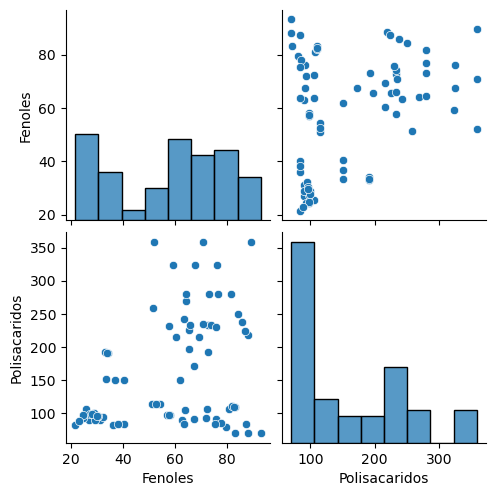

In [3]:
# Visualización inicial de los datos
sns.pairplot(data_1, kind="scatter")
plt.show()

In [4]:
# Opción 1: Modelos separados

# Modelo para Fenoles
model_fenoles = ols('Fenoles ~ C(Temp_C) + C(Tiempo_h) + C(Solv_rel)', data=data_1).fit()
anova_results_fenoles = sm.stats.anova_lm(model_fenoles, typ=2)
print('ANOVA para Fenoles')
print(anova_results_fenoles)

# Modelo para Polisacaridos
model_polisacaridos = ols('Polisacaridos ~ C(Temp_C) + C(Tiempo_h) + C(Solv_rel)', data=data_1).fit()
anova_results_polisacaridos = sm.stats.anova_lm(model_polisacaridos, typ=2)
print('\nANOVA para Polisacaridos')
print(anova_results_polisacaridos)

ANOVA para Fenoles
                   sum_sq    df           F        PR(>F)
C(Temp_C)      109.151690   2.0    0.565754  5.703690e-01
C(Tiempo_h)    122.754352   2.0    0.636259  5.321393e-01
C(Solv_rel)  30161.519902   2.0  156.332767  2.692536e-27
Residual      7138.466591  74.0         NaN           NaN

ANOVA para Polisacaridos
                    sum_sq    df          F        PR(>F)
C(Temp_C)    114386.193116   2.0  18.734406  2.611552e-07
C(Tiempo_h)   56548.490770   2.0   9.261628  2.572112e-04
C(Solv_rel)  159001.942325   2.0  26.041666  2.736778e-09
Residual     225909.966795  74.0        NaN           NaN


In [5]:
# Opción 2: MANOVA

# Modelo MANOVA
manova = MANOVA.from_formula('Fenoles + Polisacaridos ~ C(Temp_C) + C(Tiempo_h) + C(Solv_rel)', data=data_1)
print('\nResultados de MANOVA')
print(manova.mv_test())


Resultados de MANOVA
                  Multivariate linear model
                                                              
--------------------------------------------------------------
         Intercept        Value  Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.3117 2.0000 73.0000 80.6114 0.0000
           Pillai's trace 0.6883 2.0000 73.0000 80.6114 0.0000
   Hotelling-Lawley trace 2.2085 2.0000 73.0000 80.6114 0.0000
      Roy's greatest root 2.2085 2.0000 73.0000 80.6114 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        C(Temp_C)        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.6539 4.0000 146.0000  8.6358 0.0000
          Pillai's trace 0.3507 4.0000 148.0000  7.8

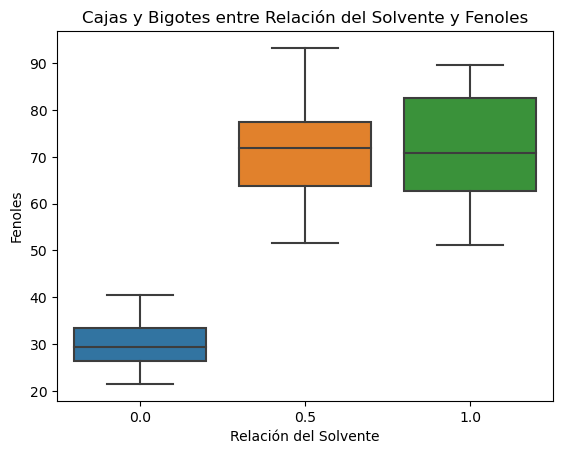

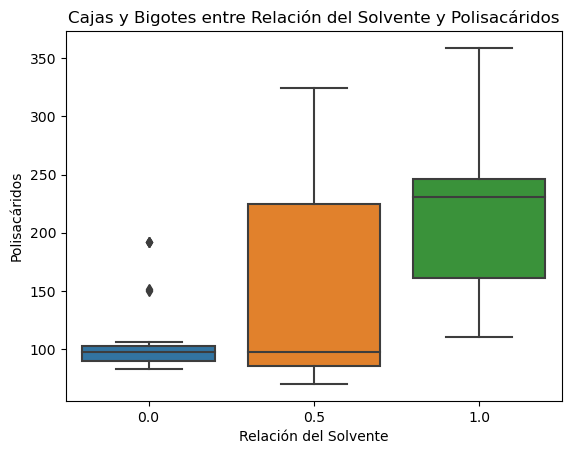

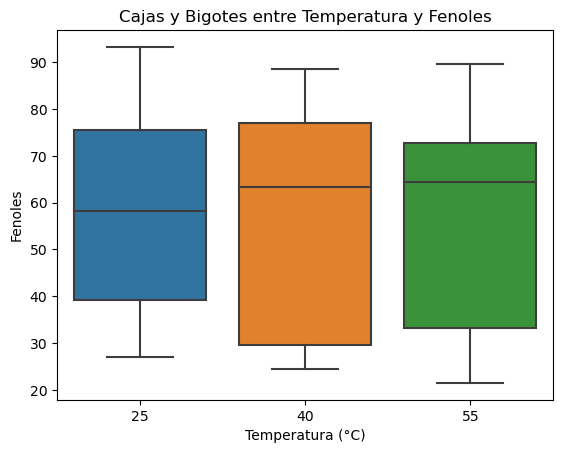

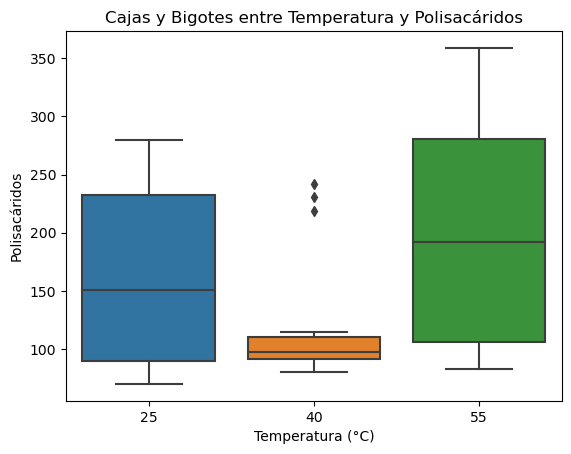

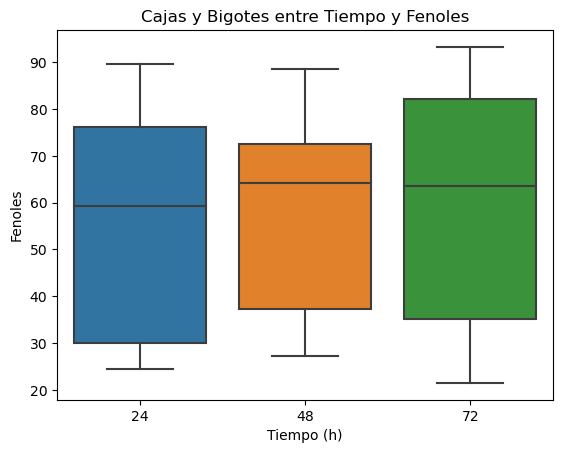

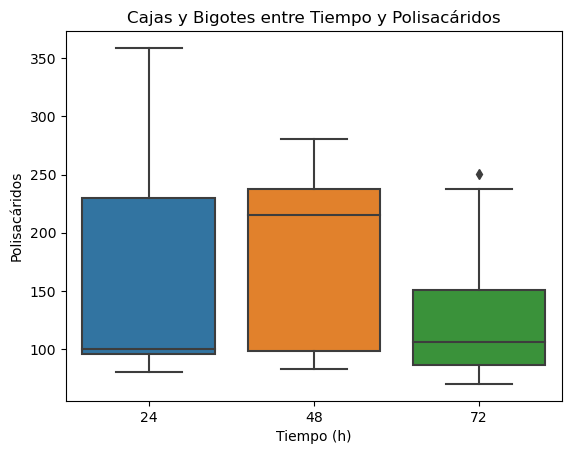

In [6]:

# Gráfico de cajas y bigotes para 'Solv_rel' vs 'Fenoles'
plt.figure()
sns.boxplot(x='Solv_rel', y='Fenoles', data=data_1)
plt.title('Cajas y Bigotes entre Relación del Solvente y Fenoles')
plt.xlabel('Relación del Solvente')
plt.ylabel('Fenoles')
plt.show()

# Gráfico de cajas y bigotes para 'Solv_rel' vs 'Polisacaridos'
plt.figure()
sns.boxplot(x='Solv_rel', y='Polisacaridos', data=data_1)
plt.title('Cajas y Bigotes entre Relación del Solvente y Polisacáridos')
plt.xlabel('Relación del Solvente')
plt.ylabel('Polisacáridos')
plt.show()

# Gráfico de cajas y bigotes para 'Temp_C' vs 'Fenoles'
plt.figure()
sns.boxplot(x='Temp_C', y='Fenoles', data=data_1)
plt.title('Cajas y Bigotes entre Temperatura y Fenoles')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Fenoles')
plt.show()

# Gráfico de cajas y bigotes para 'Temp_C' vs 'Polisacaridos'
plt.figure()
sns.boxplot(x='Temp_C', y='Polisacaridos', data=data_1)
plt.title('Cajas y Bigotes entre Temperatura y Polisacáridos')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Polisacáridos')
plt.show()

# Gráfico de cajas y bigotes para 'Tiempo_h' vs 'Fenoles'
plt.figure()
sns.boxplot(x='Tiempo_h', y='Fenoles', data=data_1)
plt.title('Cajas y Bigotes entre Tiempo y Fenoles')
plt.xlabel('Tiempo (h)')
plt.ylabel('Fenoles')
plt.show()

# Gráfico de cajas y bigotes para 'Tiempo_h' vs 'Polisacaridos'
plt.figure()
sns.boxplot(x='Tiempo_h', y='Polisacaridos', data=data_1)
plt.title('Cajas y Bigotes entre Tiempo y Polisacáridos')
plt.xlabel('Tiempo (h)')
plt.ylabel('Polisacáridos')
plt.show()


In [7]:
model_interactions_fenoles = ols('Fenoles ~ C(Temp_C) + C(Tiempo_h) + C(Solv_rel) + C(Temp_C):C(Solv_rel) + C(Tiempo_h):C(Solv_rel)', data=data_1).fit()
anova_results_fenoles = sm.stats.anova_lm(model_interactions_fenoles, typ=2)
print('\nANOVA para Fenoles')
print(anova_results_fenoles)

model_interactions_polisacaridos = ols('Polisacaridos ~ C(Temp_C) + C(Tiempo_h) + C(Solv_rel) + C(Temp_C):C(Solv_rel) + C(Tiempo_h):C(Solv_rel)', data=data_1).fit()
anova_results_polisacaridos = sm.stats.anova_lm(model_interactions_polisacaridos, typ=2)
print('\nANOVA para Polisacaridos')
print(anova_results_polisacaridos)


ANOVA para Fenoles
                               sum_sq    df           F        PR(>F)
C(Temp_C)                  109.151690   2.0    0.603317  5.499825e-01
C(Tiempo_h)                122.754352   2.0    0.678504  5.108789e-01
C(Solv_rel)              30161.519902   2.0  166.712689  1.576062e-26
C(Temp_C):C(Solv_rel)      273.877164   4.0    0.756905  5.570594e-01
C(Tiempo_h):C(Solv_rel)    894.257084   4.0    2.471427  5.294919e-02
Residual                  5970.332344  66.0         NaN           NaN

ANOVA para Polisacaridos
                                sum_sq    df          F        PR(>F)
C(Temp_C)                114386.193116   2.0  22.590435  3.357048e-08
C(Tiempo_h)               56548.490770   2.0  11.167913  6.644054e-05
C(Solv_rel)              159001.942325   2.0  31.401719  2.614231e-10
C(Temp_C):C(Solv_rel)     29610.248725   4.0   2.923904  2.739427e-02
C(Tiempo_h):C(Solv_rel)   29204.912185   4.0   2.883878  2.903953e-02
Residual                 167094.805886  66.0

In [8]:
# Opción 2: MANOVA

# Modelo MANOVA
manova = MANOVA.from_formula('Fenoles + Polisacaridos ~ C(Temp_C) + C(Tiempo_h) + C(Solv_rel) + C(Temp_C):C(Solv_rel) + C(Tiempo_h):C(Solv_rel)', data=data_1)
print('\nResultados de MANOVA')
print(manova.mv_test())


Resultados de MANOVA
                  Multivariate linear model
                                                              
--------------------------------------------------------------
         Intercept        Value  Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.4761 2.0000 65.0000 35.7695 0.0000
           Pillai's trace 0.5239 2.0000 65.0000 35.7695 0.0000
   Hotelling-Lawley trace 1.1006 2.0000 65.0000 35.7695 0.0000
      Roy's greatest root 1.1006 2.0000 65.0000 35.7695 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        C(Temp_C)        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9329 4.0000 130.0000  1.1487 0.3367
          Pillai's trace 0.0681 4.0000 132.0000  1.1

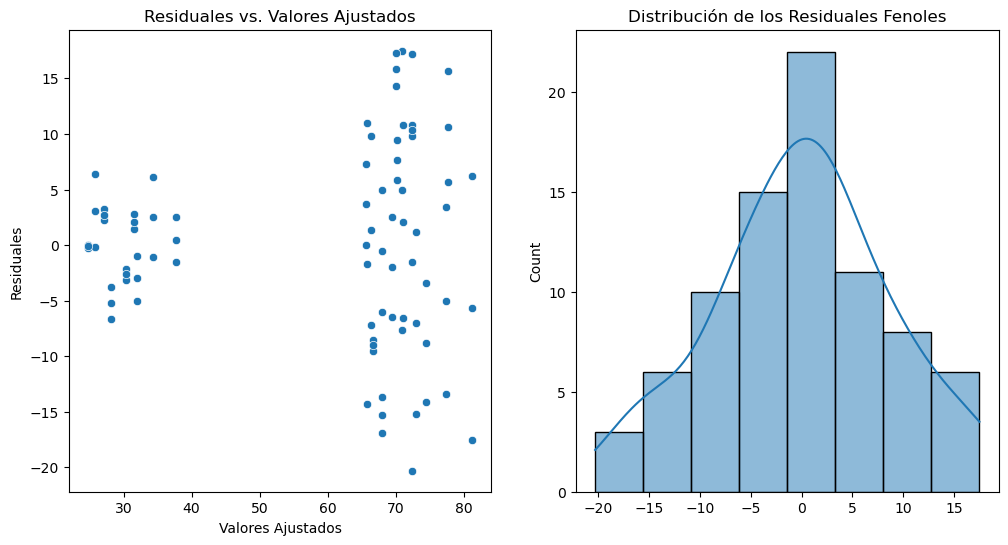

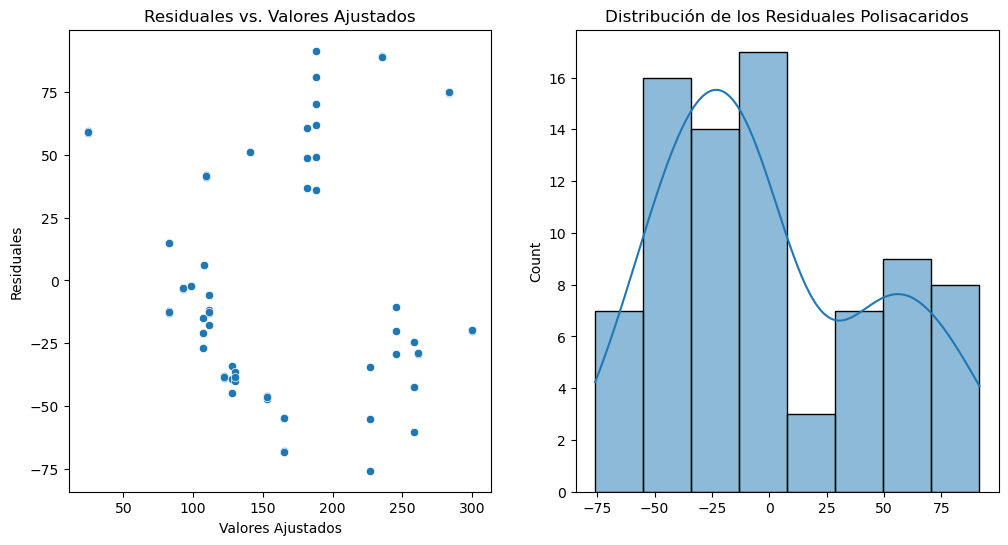

In [11]:
# Diagnóstico de residuales fenoles
residuals_f = model_interactions_fenoles.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x=model_interactions_fenoles.fittedvalues, y=residuals_f, ax=ax[0])
ax[0].set_title('Residuales vs. Valores Ajustados')
ax[0].set_xlabel('Valores Ajustados')
ax[0].set_ylabel('Residuales')

sns.histplot(residuals_f, kde=True, ax=ax[1])
ax[1].set_title('Distribución de los Residuales Fenoles')
plt.show()

# Diagnóstico de residuales polisacaridos
residuals_p = model_interactions_polisacaridos.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x=model_interactions_polisacaridos.fittedvalues, y=residuals_p, ax=ax[0])
ax[0].set_title('Residuales vs. Valores Ajustados')
ax[0].set_xlabel('Valores Ajustados')
ax[0].set_ylabel('Residuales')

sns.histplot(residuals_p, kde=True, ax=ax[1])
ax[1].set_title('Distribución de los Residuales Polisacaridos')
plt.show()

In [12]:
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan

# Prueba de normalidad de Shapiro-Wilk en los residuales Fenoles
shapiro_test = shapiro(residuals_f)
print('Prueba de Normalidad Shapiro-Wilk Fenoles:')
print(f'Estadístico W: {shapiro_test.statistic:.4f}, p-valor: {shapiro_test.pvalue:.4f}')

# Prueba de normalidad de Shapiro-Wilk en los residuales Polisacaridos
shapiro_test = shapiro(residuals_p)
print('Prueba de Normalidad Shapiro-Wilk Polisacaridos:')
print(f'Estadístico W: {shapiro_test.statistic:.4f}, p-valor: {shapiro_test.pvalue:.4f}')

Prueba de Normalidad Shapiro-Wilk Fenoles:
Estadístico W: 0.9854, p-valor: 0.4905
Prueba de Normalidad Shapiro-Wilk Polisacaridos:
Estadístico W: 0.9346, p-valor: 0.0005


In [14]:
# Obtener el coeficiente de determinación R²
r_squared_fenoles = model_interactions_fenoles.rsquared
print('R-cuadrado para el modelo de Fenoles:', r_squared_fenoles)
print(model_interactions_fenoles.summary())

# Obtener el coeficiente de determinación R²
r_squared_polisacaridos = model_interactions_polisacaridos.rsquared
print('R-cuadrado para el modelo de Polisacaridos:', r_squared_polisacaridos)
print(model_interactions_polisacaridos.summary())

R-cuadrado para el modelo de Fenoles: 0.8409264244199128
                            OLS Regression Results                            
Dep. Variable:                Fenoles   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     24.92
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           5.36e-21
Time:                        08:37:00   Log-Likelihood:                -289.09
No. Observations:                  81   AIC:                             608.2
Df Residuals:                      66   BIC:                             644.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [15]:
# Diagnóstico de homocedasticidad de Breusch-Pagan Fenoles
lm_test = het_breuschpagan(residuals_f, model_interactions_fenoles.model.exog)
print('\nPrueba de Homocedasticidad de Breusch-Pagan:')
print(f'Estadístico LM: {lm_test[0]:.4f}, p-valor: {lm_test[1]:.4f}')

# Diagnóstico de homocedasticidad de Breusch-Pagan Polisacaridos
lm_test = het_breuschpagan(residuals_p, model_interactions_polisacaridos.model.exog)
print('\nPrueba de Homocedasticidad de Breusch-Pagan:')
print(f'Estadístico LM: {lm_test[0]:.4f}, p-valor: {lm_test[1]:.4f}')


Prueba de Homocedasticidad de Breusch-Pagan:
Estadístico LM: 31.2313, p-valor: 0.0051

Prueba de Homocedasticidad de Breusch-Pagan:
Estadístico LM: 37.1852, p-valor: 0.0007


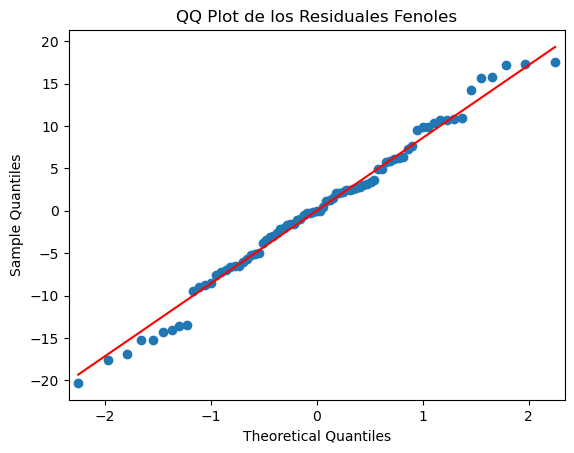

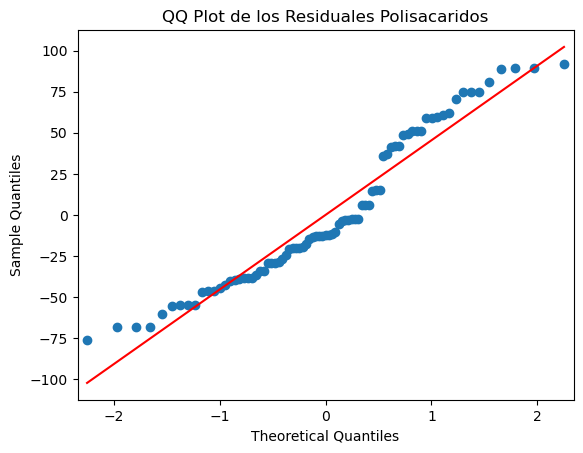

In [16]:
# Graficar QQ plot para evaluar la normalidad de los residuales Fenoles
sm.qqplot(residuals_f, line='s')
plt.title('QQ Plot de los Residuales Fenoles')
plt.show()

# Graficar QQ plot para evaluar la normalidad de los residuales Polisacaridos
sm.qqplot(residuals_p, line='s')
plt.title('QQ Plot de los Residuales Polisacaridos')
plt.show()

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    0.5  40.9498    0.0 34.6286 47.2709   True
   0.0    1.0  40.9194    0.0 34.5983 47.2405   True
   0.5    1.0  -0.0304 0.9999 -6.3515  6.2908  False
----------------------------------------------------


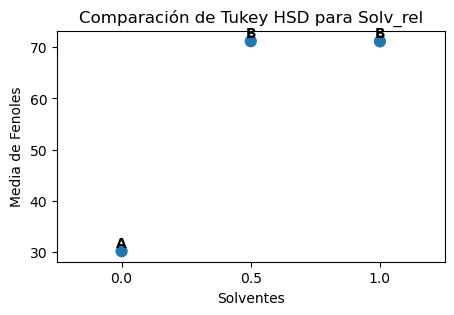

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    25     40  -1.8813 0.9466 -16.1248 12.3623  False
    25     55  -2.7872 0.8867 -17.0307 11.4564  False
    40     55  -0.9059 0.9874 -15.1494 13.3376  False
-----------------------------------------------------


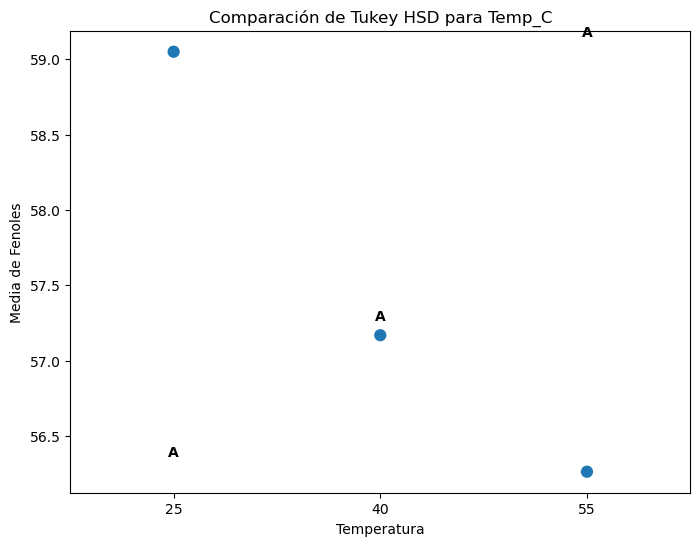

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    24     48   1.1709  0.979   -13.07 15.4119  False
    24     72    2.992 0.8706 -11.2489 17.2329  False
    48     72   1.8211 0.9499 -12.4199  16.062  False
-----------------------------------------------------


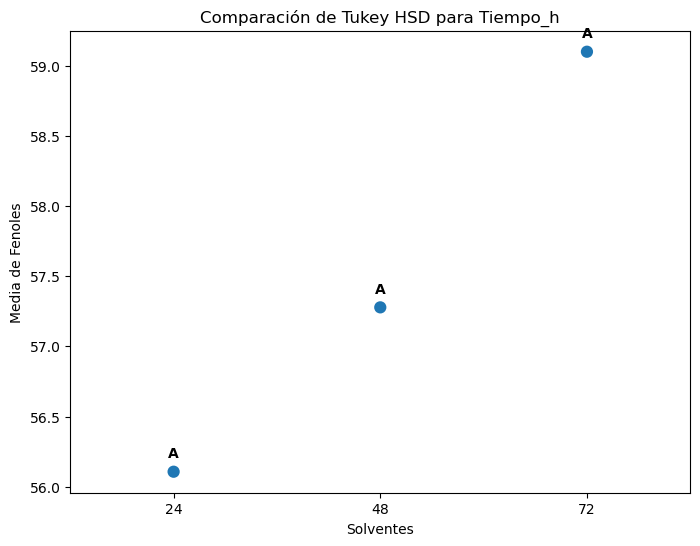

In [51]:
# Realizar la prueba de Tukey HSD para Temp_C
tukey_result_temp = pairwise_tukeyhsd(endog=data_1['Fenoles'],
                                      groups=data_1['Solv_rel'],
                                      alpha=0.05)
print(tukey_result_temp)

# Extraer las medias
mean_data_temp = data_1.groupby('Solv_rel')['Fenoles'].mean().reset_index()
mean_data_temp = mean_data_temp.sort_values('Fenoles').reset_index(drop=True)

# Función actualizada para obtener las letras de los grupos
def get_tukey_groups_temp(tukey, mean_data_temp):
    # Extraer los datos de la tabla resumen
    tukey_summary = tukey.summary()
    data = tukey_summary.data[1:]  # Omitir la fila de encabezado
    # Cada fila tiene: group1, group2, meandiff, p-adj, lower, upper, reject
    # Construir un DataFrame a partir de esto
    tukey_results = pd.DataFrame(data, columns=['group1', 'group2', 'meandiff', 'p-adj', 'lower', 'upper', 'reject'])
    
    # Convertir las columnas apropiadas a tipos numéricos y booleanos
    tukey_results['reject'] = tukey_results['reject'].astype(str) == 'True'
    tukey_results['p-adj'] = tukey_results['p-adj'].astype(float)
    tukey_results['meandiff'] = tukey_results['meandiff'].astype(float)
    tukey_results['lower'] = tukey_results['lower'].astype(float)
    tukey_results['upper'] = tukey_results['upper'].astype(float)
    
    # Inicializar la asignación de letras
    sorted_groups = mean_data_temp['Solv_rel'].tolist()
    group_letters = {}
    current_letter = 'A'
    group_letters[sorted_groups[0]] = current_letter

    for i in range(1, len(sorted_groups)):
        curr_group = sorted_groups[i]
        assigned = False
        for letter in set(group_letters.values()):
            # Comparar con todos los grupos que tienen la misma letra
            groups_with_letter = [grp for grp, ltr in group_letters.items() if ltr == letter]
            significant = False
            for prev_group in groups_with_letter:
                comp = tukey_results[((tukey_results['group1'] == prev_group) & (tukey_results['group2'] == curr_group)) |
                                     ((tukey_results['group1'] == curr_group) & (tukey_results['group2'] == prev_group))]
                if not comp.empty and comp['reject'].values[0]:
                    significant = True
                    break
            if not significant:
                group_letters[curr_group] = letter
                assigned = True
                break
        if not assigned:
            # Incrementar la letra
            current_letter = chr(ord(current_letter) + 1)
            group_letters[curr_group] = current_letter

    mean_data_temp['groups'] = mean_data_temp['Solv_rel'].map(group_letters)
    return mean_data_temp

mean_data_temp = get_tukey_groups_temp(tukey_result_temp, mean_data_temp)

# Crear el gráfico
plt.figure(figsize=(5,3))
ax = sns.pointplot(x='Solv_rel', y='Fenoles', data=mean_data_temp, join=False, capsize=0.1)
for i, row in mean_data_temp.iterrows():
    ax.text(i, row['Fenoles'] + 0.8, row['groups'], horizontalalignment='center', size='medium',
            color='black', weight='semibold')

plt.title('Comparación de Tukey HSD para Solv_rel')
plt.xlabel('Solventes')
plt.ylabel('Media de Fenoles')
plt.show()

# Realizar la prueba de Tukey HSD para Temp_C
tukey_result_temp = pairwise_tukeyhsd(endog=data_1['Fenoles'],
                                      groups=data_1['Temp_C'],
                                      alpha=0.05)
print(tukey_result_temp)

# Extraer las medias
mean_data_temp = data_1.groupby('Temp_C')['Fenoles'].mean().reset_index()
mean_data_temp = mean_data_temp.sort_values('Fenoles').reset_index(drop=True)

# Función actualizada para obtener las letras de los grupos
def get_tukey_groups_temp(tukey, mean_data_temp):
    # Extraer los datos de la tabla resumen
    tukey_summary = tukey.summary()
    data = tukey_summary.data[1:]  # Omitir la fila de encabezado
    # Cada fila tiene: group1, group2, meandiff, p-adj, lower, upper, reject
    # Construir un DataFrame a partir de esto
    tukey_results = pd.DataFrame(data, columns=['group1', 'group2', 'meandiff', 'p-adj', 'lower', 'upper', 'reject'])
    
    # Convertir las columnas apropiadas a tipos numéricos y booleanos
    tukey_results['reject'] = tukey_results['reject'].astype(str) == 'True'
    tukey_results['p-adj'] = tukey_results['p-adj'].astype(float)
    tukey_results['meandiff'] = tukey_results['meandiff'].astype(float)
    tukey_results['lower'] = tukey_results['lower'].astype(float)
    tukey_results['upper'] = tukey_results['upper'].astype(float)
    
    # Inicializar la asignación de letras
    sorted_groups = mean_data_temp['Temp_C'].tolist()
    group_letters = {}
    current_letter = 'A'
    group_letters[sorted_groups[0]] = current_letter

    for i in range(1, len(sorted_groups)):
        curr_group = sorted_groups[i]
        assigned = False
        for letter in set(group_letters.values()):
            # Comparar con todos los grupos que tienen la misma letra
            groups_with_letter = [grp for grp, ltr in group_letters.items() if ltr == letter]
            significant = False
            for prev_group in groups_with_letter:
                comp = tukey_results[((tukey_results['group1'] == prev_group) & (tukey_results['group2'] == curr_group)) |
                                     ((tukey_results['group1'] == curr_group) & (tukey_results['group2'] == prev_group))]
                if not comp.empty and comp['reject'].values[0]:
                    significant = True
                    break
            if not significant:
                group_letters[curr_group] = letter
                assigned = True
                break
        if not assigned:
            # Incrementar la letra
            current_letter = chr(ord(current_letter) + 1)
            group_letters[curr_group] = current_letter

    mean_data_temp['groups'] = mean_data_temp['Temp_C'].map(group_letters)
    return mean_data_temp

mean_data_temp = get_tukey_groups_temp(tukey_result_temp, mean_data_temp)

# Crear el gráfico
plt.figure(figsize=(8,6))
ax = sns.pointplot(x='Temp_C', y='Fenoles', data=mean_data_temp, join=False, capsize=0.1)
for i, row in mean_data_temp.iterrows():
    ax.text(i, row['Fenoles'] + 0.1, row['groups'], horizontalalignment='center', size='medium',
            color='black', weight='semibold')

plt.title('Comparación de Tukey HSD para Temp_C')
plt.xlabel('Temperatura')
plt.ylabel('Media de Fenoles')
plt.show()

# Realizar la prueba de Tukey HSD para Tiempo_h
tukey_result_temp = pairwise_tukeyhsd(endog=data_1['Fenoles'],
                                      groups=data_1['Tiempo_h'],
                                      alpha=0.05)
print(tukey_result_temp)

# Extraer las medias
mean_data_temp = data_1.groupby('Tiempo_h')['Fenoles'].mean().reset_index()
mean_data_temp = mean_data_temp.sort_values('Fenoles').reset_index(drop=True)

# Función actualizada para obtener las letras de los grupos
def get_tukey_groups_temp(tukey, mean_data_temp):
    # Extraer los datos de la tabla resumen
    tukey_summary = tukey.summary()
    data = tukey_summary.data[1:]  # Omitir la fila de encabezado
    # Cada fila tiene: group1, group2, meandiff, p-adj, lower, upper, reject
    # Construir un DataFrame a partir de esto
    tukey_results = pd.DataFrame(data, columns=['group1', 'group2', 'meandiff', 'p-adj', 'lower', 'upper', 'reject'])
    
    # Convertir las columnas apropiadas a tipos numéricos y booleanos
    tukey_results['reject'] = tukey_results['reject'].astype(str) == 'True'
    tukey_results['p-adj'] = tukey_results['p-adj'].astype(float)
    tukey_results['meandiff'] = tukey_results['meandiff'].astype(float)
    tukey_results['lower'] = tukey_results['lower'].astype(float)
    tukey_results['upper'] = tukey_results['upper'].astype(float)
    
    # Inicializar la asignación de letras
    sorted_groups = mean_data_temp['Tiempo_h'].tolist()
    group_letters = {}
    current_letter = 'A'
    group_letters[sorted_groups[0]] = current_letter

    for i in range(1, len(sorted_groups)):
        curr_group = sorted_groups[i]
        assigned = False
        for letter in set(group_letters.values()):
            # Comparar con todos los grupos que tienen la misma letra
            groups_with_letter = [grp for grp, ltr in group_letters.items() if ltr == letter]
            significant = False
            for prev_group in groups_with_letter:
                comp = tukey_results[((tukey_results['group1'] == prev_group) & (tukey_results['group2'] == curr_group)) |
                                     ((tukey_results['group1'] == curr_group) & (tukey_results['group2'] == prev_group))]
                if not comp.empty and comp['reject'].values[0]:
                    significant = True
                    break
            if not significant:
                group_letters[curr_group] = letter
                assigned = True
                break
        if not assigned:
            # Incrementar la letra
            current_letter = chr(ord(current_letter) + 1)
            group_letters[curr_group] = current_letter

    mean_data_temp['groups'] = mean_data_temp['Tiempo_h'].map(group_letters)
    return mean_data_temp

mean_data_temp = get_tukey_groups_temp(tukey_result_temp, mean_data_temp)

# Crear el gráfico
plt.figure(figsize=(8,6))
ax = sns.pointplot(x='Tiempo_h', y='Fenoles', data=mean_data_temp, join=False, capsize=0.1)
for i, row in mean_data_temp.iterrows():
    ax.text(i, row['Fenoles'] + 0.1, row['groups'], horizontalalignment='center', size='medium',
            color='black', weight='semibold')

plt.title('Comparación de Tukey HSD para Tiempo_h')
plt.xlabel('Solventes')
plt.ylabel('Media de Fenoles')
plt.show()


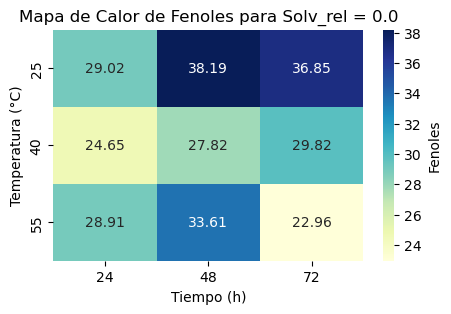

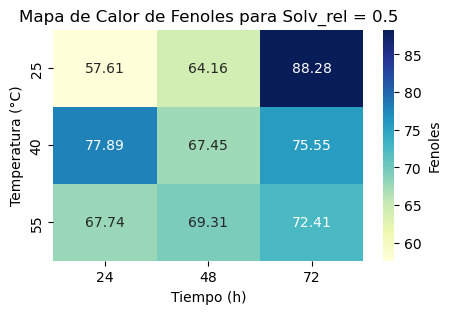

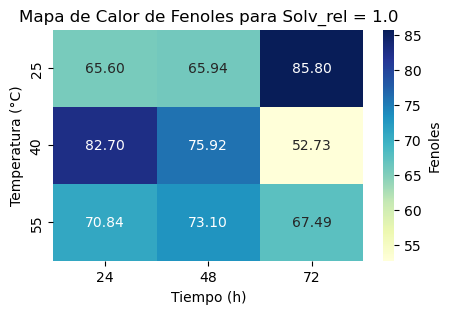

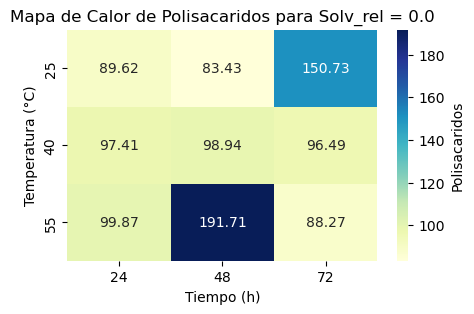

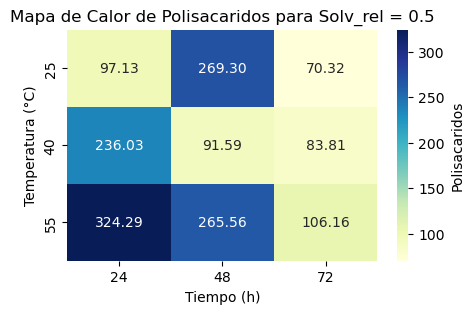

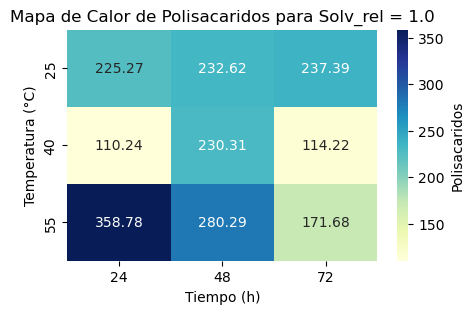

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo Excel
file_path = 'C:/Users/User/Desktop/Promedios_fenoles_polisacaridos.xlsx'
data = pd.read_excel(file_path)

# Asegurarse de que las variables categóricas son de tipo 'category' y ordenarlas
data['Temp_C'] = data['Temp_C'].astype(int).astype(str)
data['Tiempo_h'] = data['Tiempo_h'].astype(int).astype(str)
data['Solv_rel'] = data['Solv_rel'].astype(str)

data['Temp_C'] = pd.Categorical(data['Temp_C'], categories=sorted(data['Temp_C'].unique()), ordered=True)
data['Tiempo_h'] = pd.Categorical(data['Tiempo_h'], categories=sorted(data['Tiempo_h'].unique()), ordered=True)

# Obtener los niveles únicos de Solv_rel
solv_rel_levels = data['Solv_rel'].unique()

# Crear un mapa de calor para cada nivel de Solv_rel
for solv in solv_rel_levels:
    # Filtrar los datos para el nivel actual de Solv_rel
    data_subset = data[data['Solv_rel'] == solv]
    
    # Crear una tabla dinámica con Temp_C como filas, Tiempo_h como columnas, y Fenoles como valores
    pivot_table = data_subset.pivot_table(values='Fenoles', index='Temp_C', columns='Tiempo_h', aggfunc=np.mean)
    
    # Crear el mapa de calor
    plt.figure(figsize=(5, 3))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Fenoles'})
    plt.title(f'Mapa de Calor de Fenoles para Solv_rel = {solv}')
    plt.xlabel('Tiempo (h)')
    plt.ylabel('Temperatura (°C)')
    plt.show()

# Cargar el archivo Excel
file_path = 'C:/Users/User/Desktop/DiseñoExp_polisacaridos_fenoles_hongos.xlsx'
data = pd.read_excel(file_path)

# Asegurarse de que las variables categóricas son de tipo 'category' y ordenarlas
data['Temp_C'] = data['Temp_C'].astype(int).astype(str)
data['Tiempo_h'] = data['Tiempo_h'].astype(int).astype(str)
data['Solv_rel'] = data['Solv_rel'].astype(str)

data['Temp_C'] = pd.Categorical(data['Temp_C'], categories=sorted(data['Temp_C'].unique()), ordered=True)
data['Tiempo_h'] = pd.Categorical(data['Tiempo_h'], categories=sorted(data['Tiempo_h'].unique()), ordered=True)

# Obtener los niveles únicos de Solv_rel
solv_rel_levels = data['Solv_rel'].unique()

# Crear un mapa de calor para cada nivel de Solv_rel
for solv in solv_rel_levels:
    # Filtrar los datos para el nivel actual de Solv_rel
    data_subset = data[data['Solv_rel'] == solv]
    
    # Crear una tabla dinámica con Temp_C como filas, Tiempo_h como columnas, y Fenoles como valores
    pivot_table = data_subset.pivot_table(values='Polisacaridos', index='Temp_C', columns='Tiempo_h', aggfunc=np.mean)
    
    # Crear el mapa de calor
    plt.figure(figsize=(5, 3))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Polisacaridos'})
    plt.title(f'Mapa de Calor de Polisacaridos para Solv_rel = {solv}')
    plt.xlabel('Tiempo (h)')
    plt.ylabel('Temperatura (°C)')
    plt.show()

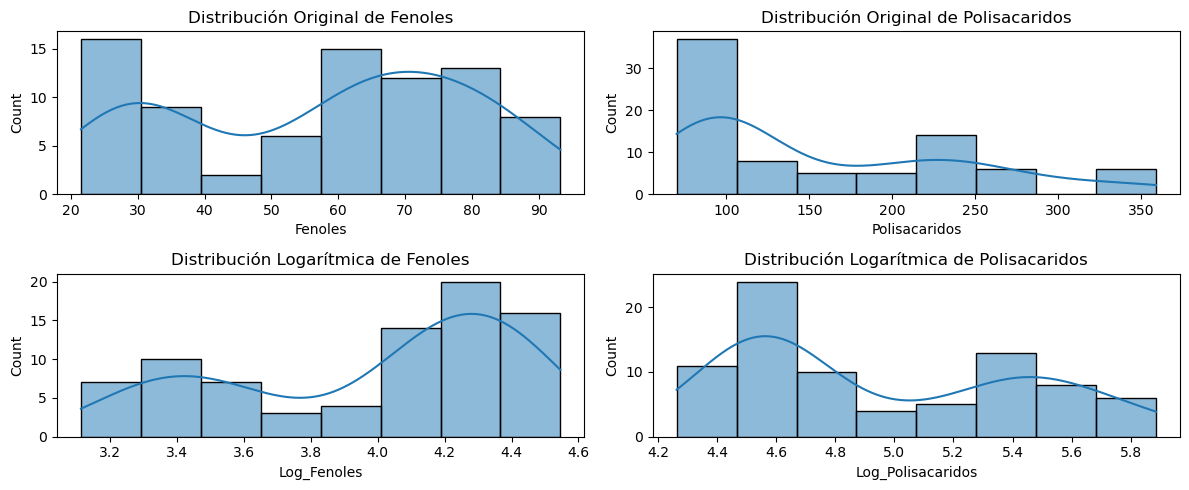

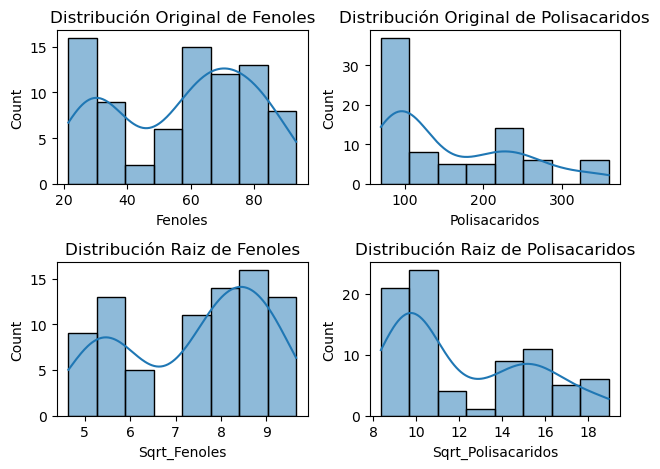

In [26]:
# 1. Transformaciones
variables = ['Fenoles', 'Polisacaridos']

# Logarítmica
for var in variables:
    data_1[f'Log_{var}'] = np.log(data_1[var] + 1)

# Raíz cuadrada
for var in variables:
    data_1[f'Sqrt_{var}'] = np.sqrt(data_1[var])

# 2. Visualización
plt.figure(figsize=(12, 5))

for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.histplot(data_1[var], kde=True)
    plt.title(f'Distribución Original de {var}')
    
    plt.subplot(2, 2, i+3)
    sns.histplot(data_1[f'Log_{var}'], kde=True)
    plt.title(f'Distribución Logarítmica de {var}')    
plt.tight_layout()
plt.show()

for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.histplot(data_1[var], kde=True)
    plt.title(f'Distribución Original de {var}')
    
    plt.subplot(2, 2, i+3)
    sns.histplot(data_1[f'Sqrt_{var}'], kde=True)
    plt.title(f'Distribución Raiz de {var}')
plt.tight_layout()
plt.show()

In [43]:
model_interactions_fenoles_Sqrt = ols(f'Sqrt_Fenoles ~ C(Temp_C) + C(Tiempo_h) + C(Solv_rel) + C(Temp_C):C(Solv_rel) + C(Tiempo_h):C(Solv_rel)', data=data_1).fit()
anova_results_fenoles_Sqrt = sm.stats.anova_lm(model_interactions_fenoles_Sqrt, typ=2)
print('\nANOVA para Fenoles Sqrt')
print(anova_results_fenoles_Sqrt)

# Obtener el coeficiente de determinación R²
r_squared_sqrt_fenoles = model_interactions_fenoles_Sqrt.rsquared
print('R-cuadrado sqrt_fenoles:', r_squared_sqrt_fenoles)

model_interactions_polisacaridos_Sqrt = ols(f'Sqrt_Polisacaridos ~ C(Temp_C) + C(Tiempo_h) + C(Solv_rel) + C(Temp_C):C(Solv_rel) + C(Tiempo_h):C(Solv_rel)', data=data_1).fit()
anova_results_polisacaridos_Sqrt = sm.stats.anova_lm(model_interactions_polisacaridos_Sqrt, typ=2)
print('\nANOVA para Polisacaridos Sqrt')
print(anova_results_polisacaridos_Sqrt)

# Obtener el coeficiente de determinación R²
r_squared_sqrt_polisacaridos = model_interactions_polisacaridos_Sqrt.rsquared
print('R-cuadrado sqrt_polisacaridos:', r_squared_sqrt_polisacaridos)

#--------------------------------------------------

model_interactions_fenoles_Log = ols(f'Log_Fenoles ~ C(Temp_C) + C(Tiempo_h) + C(Solv_rel) + C(Temp_C):C(Solv_rel) + C(Tiempo_h):C(Solv_rel)', data=data_1).fit()
anova_results_fenoles_Log = sm.stats.anova_lm(model_interactions_fenoles_Log, typ=2)
print('\nANOVA para Fenoles Log')
print(anova_results_fenoles_Log)

r_squared_log_fenoles = model_interactions_fenoles_Log.rsquared
print('R-cuadrado log_fenoles:', r_squared_log_fenoles)

model_interactions_polisacaridos_Log = ols(f'Log_Polisacaridos ~ C(Temp_C) + C(Tiempo_h) + C(Solv_rel) + C(Temp_C):C(Solv_rel) + C(Tiempo_h):C(Solv_rel)', data=data_1).fit()
anova_results_polisacaridos_Log = sm.stats.anova_lm(model_interactions_polisacaridos_Log, typ=2)
print('\nANOVA para Polisacaridos Log')
print(anova_results_polisacaridos_Log)

r_squared_log_polisacaridos = model_interactions_polisacaridos_Log.rsquared
print('R-cuadrado log_polisacaridos:', r_squared_log_polisacaridos)


ANOVA para Fenoles Sqrt
                             sum_sq    df           F        PR(>F)
C(Temp_C)                  0.720429   2.0    1.049193  3.559875e-01
C(Tiempo_h)                0.511649   2.0    0.745137  4.786195e-01
C(Solv_rel)              154.728094   2.0  225.337459  3.226832e-30
C(Temp_C):C(Solv_rel)      1.907933   4.0    1.389304  2.472749e-01
C(Tiempo_h):C(Solv_rel)    3.688665   4.0    2.685984  3.874579e-02
Residual                  22.659469  66.0         NaN           NaN
R-cuadrado sqrt_fenoles: 0.8769952703881502

ANOVA para Polisacaridos Sqrt
                             sum_sq    df          F        PR(>F)
C(Temp_C)                160.691243   2.0  23.724262  1.724201e-08
C(Tiempo_h)               82.735967   2.0  12.215039  3.066367e-05
C(Solv_rel)              238.514769   2.0  35.214033  3.918564e-11
C(Temp_C):C(Solv_rel)     42.161406   4.0   3.112330  2.081961e-02
C(Tiempo_h):C(Solv_rel)   44.401312   4.0   3.277678  1.636891e-02
Residual              

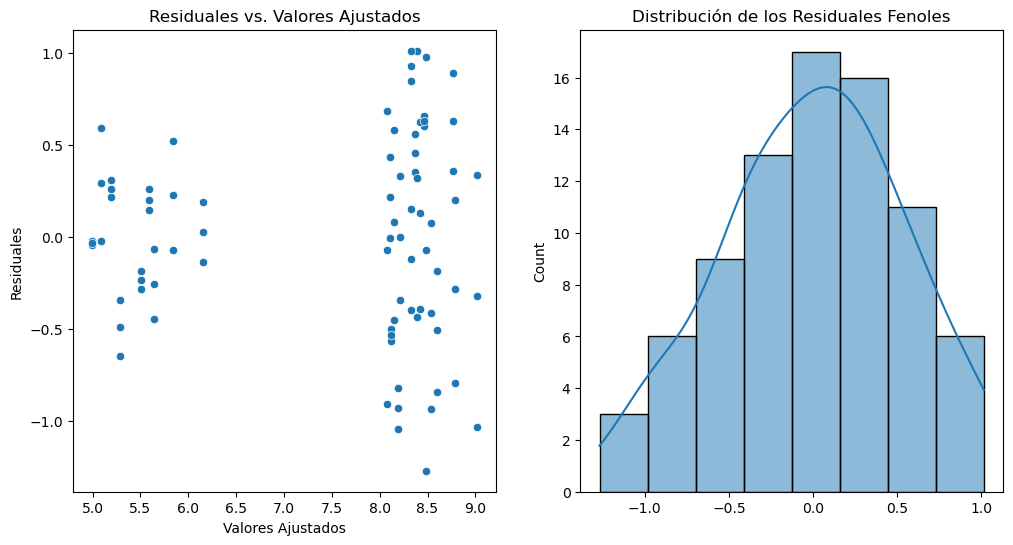

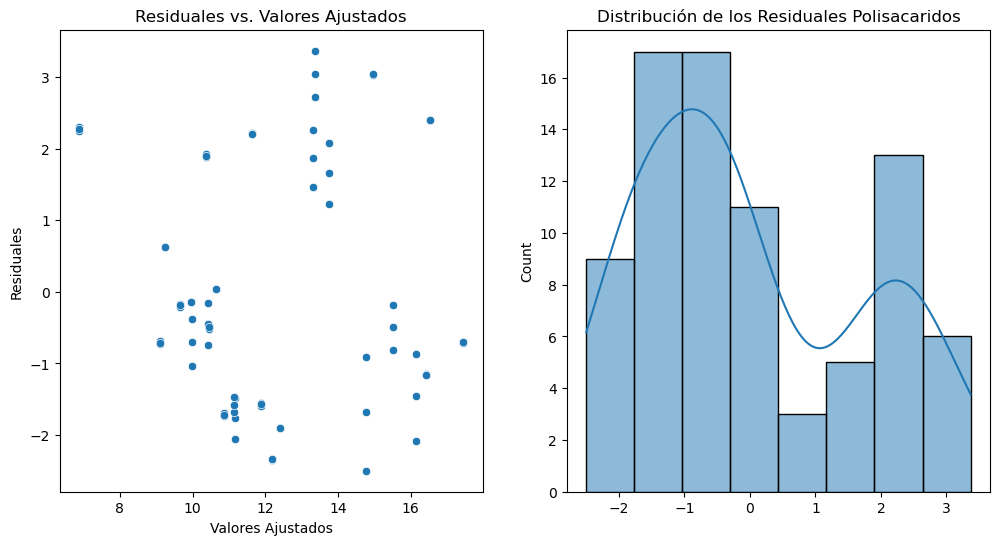

In [45]:
# Diagnóstico de residuales fenoles
residuals_fr = model_interactions_fenoles_Sqrt.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x=model_interactions_fenoles_Sqrt.fittedvalues, y=residuals_fr, ax=ax[0])
ax[0].set_title('Residuales vs. Valores Ajustados')
ax[0].set_xlabel('Valores Ajustados')
ax[0].set_ylabel('Residuales')

sns.histplot(residuals_fr, kde=True, ax=ax[1])
ax[1].set_title('Distribución de los Residuales Fenoles')
plt.show()

# Diagnóstico de residuales polisacaridos
residuals_pr = model_interactions_polisacaridos_Sqrt.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x=model_interactions_polisacaridos_Sqrt.fittedvalues, y=residuals_pr, ax=ax[0])
ax[0].set_title('Residuales vs. Valores Ajustados')
ax[0].set_xlabel('Valores Ajustados')
ax[0].set_ylabel('Residuales')

sns.histplot(residuals_pr, kde=True, ax=ax[1])
ax[1].set_title('Distribución de los Residuales Polisacaridos')
plt.show()

In [47]:
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan

# Prueba de normalidad de Shapiro-Wilk en los residuales Fenoles
shapiro_test = shapiro(residuals_fr)
print('Prueba de Normalidad Shapiro-Wilk Fenoles_sqrt:')
print(f'Estadístico W: {shapiro_test.statistic:.4f}, p-valor: {shapiro_test.pvalue:.4f}')

# Prueba de normalidad de Shapiro-Wilk en los residuales Polisacaridos
shapiro_test = shapiro(residuals_pr)
print('Prueba de Normalidad Shapiro-Wilk Polisacaridos_sqrt:')
print(f'Estadístico W: {shapiro_test.statistic:.4f}, p-valor: {shapiro_test.pvalue:.4f}')

Prueba de Normalidad Shapiro-Wilk Fenoles_sqrt:
Estadístico W: 0.9858, p-valor: 0.5119
Prueba de Normalidad Shapiro-Wilk Polisacaridos_sqrt:
Estadístico W: 0.9129, p-valor: 0.0000
